In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from collections import Counter
from sklearn.model_selection import train_test_split

In [25]:
connections = pd.read_csv(f'./data/connections.csv', delimiter='\t')
connections.info()
connections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15155 non-null  object 
 1   imei               15155 non-null  int64  
 2   mwra               15155 non-null  float64
 3   c.katana           15155 non-null  float64
 4   c.dogalize         15155 non-null  float64
 5   c.android.youtube  15155 non-null  float64
 6   c.android.chrome   15155 non-null  float64
 7   c.android.gm       15155 non-null  float64
 8   c.raider           15155 non-null  float64
 9   c.UCMobile.x86     15155 non-null  float64
 10  c.updateassist     15155 non-null  float64
 11  c.UCMobile.intl    15155 non-null  float64
 12  c.android.vending  15155 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,c.updateassist,c.UCMobile.intl,c.android.vending
0,2018-05-05 10:00:00,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,62.35464,72.81987,11.24912
1,2018-05-05 10:01:00,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,64.58400,9.11802,31.03623
2,2018-05-05 10:02:00,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,23.34476,86.06474,45.28060
3,2018-05-05 10:03:00,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,37.14845,91.60321,64.76852
4,2018-05-05 10:04:00,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,68.27938,89.99798,15.42470


In [26]:
processes = pd.read_csv(f'./data/processes.csv', delimiter='\t')
processes.info()
processes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15155 non-null  object 
 1   imei                        15155 non-null  int64  
 2   mwra                        15155 non-null  float64
 3   p.system                    15155 non-null  float64
 4   p.android.gm                15155 non-null  float64
 5   p.android.settings          15155 non-null  float64
 6   p.android.chrome            15155 non-null  float64
 7   p.android.packageinstaller  15155 non-null  float64
 8   p.android.documentsui       15155 non-null  float64
 9   p.android.externalstorage   15155 non-null  float64
 10  p.android.vending           15155 non-null  float64
 11  p.olauncher                 15155 non-null  float64
 12  p.android.defcontainer      15155 non-null  float64
 13  p.dogalize                  151

,ts,imei,mwra,p.system,p.android.gm,p.android.settings,p.android.chrome,p.android.packageinstaller,p.android.documentsui,p.android.externalstorage,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,2018-05-05 10:00:00,8630330696303481172,1.0,10.85162,5.76758,12.23591,13.47511,15.75761,7.84882,10.31012,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,2018-05-05 10:01:00,3590433799317662097,0.0,11.19103,11.05400,6.73356,9.66098,11.64789,13.19432,7.79902,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,2018-05-05 10:02:00,3590433799317661123,0.0,10.13556,8.68557,7.66270,9.71330,12.86800,10.82623,6.12165,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,2018-05-05 10:03:00,8630330696303481909,1.0,7.20268,6.00790,10.73122,10.83178,14.65533,8.63345,12.01726,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,2018-05-05 10:04:00,8630330696303481701,1.0,9.63418,9.27475,10.71554,15.98658,16.01235,7.17058,11.39136,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [27]:
connections['ts'] = pd.to_datetime(connections['ts']).astype(np.int64)

In [28]:
processes['ts'] = pd.to_datetime(processes['ts']).astype(np.int64)

In [29]:
new_dataset = pd.merge(connections, processes, on=['imei', 'ts', 'mwra'])
new_dataset.head()

,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,1525514400000000000,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,1525514460000000000,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,1525514520000000000,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,1525514580000000000,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,1525514640000000000,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135


In [30]:
new_dataset

,ts,imei,mwra,c.katana,c.dogalize,c.android.youtube,c.android.chrome,c.android.gm,c.raider,c.UCMobile.x86,...,p.dogalize,p.browser.provider,p.notifier,p.gms.persistent,p.inputmethod.latin,p.katana,p.google,p.process.gapps,p.android.gms,p.simulator
0,1525514400000000000,8630330696303481172,1.0,9.29393,9.65293,9.18203,7.64836,14.61376,47.82024,54.33564,...,53.39714,48.75442,57.61393,62.34198,54.36855,70.29131,77.50615,81.28121,71.85749,9.12899
1,1525514460000000000,3590433799317662097,0.0,9.87107,6.65895,10.84119,9.05362,11.03129,35.76535,48.01631,...,38.19170,43.23944,64.95890,4.65765,58.14930,41.15580,79.63176,92.37950,10.43540,61.58344
2,1525514520000000000,3590433799317661123,0.0,15.31239,5.01324,10.87556,6.65091,13.41425,57.80452,68.35074,...,34.04061,73.33044,63.96102,43.23826,48.85930,13.37236,86.74975,88.53951,32.99274,63.99667
3,1525514580000000000,8630330696303481909,1.0,8.23151,9.76082,9.77154,9.98477,14.15220,51.48972,87.82917,...,63.82486,34.79186,72.32636,98.03954,99.86546,97.03455,4.55653,75.56993,21.74111,9.71695
4,1525514640000000000,8630330696303481701,1.0,8.02947,10.25168,6.63390,6.77049,10.60092,30.43476,92.26847,...,39.13822,52.84187,72.66790,84.47463,50.03377,75.08935,82.13932,23.30607,47.49774,81.93135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,1526379480000000000,8630330696303482147,1.0,10.56641,14.11005,14.41197,14.18357,10.19200,37.37893,12.61802,...,50.31696,40.92997,87.74093,85.68022,74.24349,31.05734,59.55667,96.39741,64.66882,17.09412
15511,1525862160000000000,359043379931766494,1.0,11.31192,13.64240,12.69253,9.69818,9.21048,62.28946,70.33297,...,53.34673,21.81320,26.58583,0.72731,34.81966,96.04223,21.20380,98.25850,48.48778,28.24355
15512,1525862160000000000,359043379931766494,1.0,11.31192,13.64240,12.69253,9.69818,9.21048,62.28946,70.33297,...,53.34673,21.81320,26.58583,0.72731,34.81966,96.04223,21.20380,98.25850,48.48778,28.24355
15513,1525593540000000000,8630330696303481271,1.0,8.00197,11.48360,10.18327,9.07833,13.24834,43.89161,66.70692,...,54.44092,59.80504,91.44128,41.87333,40.33199,92.19788,25.30395,89.09121,55.55247,7.68633


#### Data cleaning:

Find negative values in the merged dataset:

In [31]:
negative_values = new_dataset.select_dtypes(include=[np.number]) < 0

# any for columns and all values in the series of the first any
has_negatives = negative_values.any().any()

if has_negatives:
    print("The dataset has negative values.")
    print(negative_values.any())  
else:
    print("No negative values found in the dataset.")

No negative values found in the dataset.


Find NaN values in the merged dataset:

In [32]:
has_nan = new_dataset.isnull().values.any()

if has_nan:
    print("The dataset has NaN values.")
    print(new_dataset.isnull().values)
else:
    print("No NaN values found in the dataset.")

No NaN values found in the dataset.


Find duplicity values in the merged dataset:

In [33]:
has_duplicity = new_dataset.duplicated().any()

if has_duplicity:
    print("The dataset has duplicity values.")
    print(new_dataset[new_dataset.duplicated()])
    print("Number of duplicate rows:", new_dataset.duplicated().sum())
else:
    print("No duplicity values found in the dataset.")

The dataset has duplicity values.
                        ts                 imei  mwra  c.katana  c.dogalize  \
29     1525516080000000000  8630330696303481412   1.0  12.10416    11.83601   
137    1525522500000000000  3590433799317662287   1.0  10.37263     9.86367   
339    1525534560000000000   863033069630348438   1.0  11.76904    11.50224   
356    1525535520000000000  8630330696303481644   1.0  12.34533    16.75461   
365    1525536000000000000  3590433799317662477   1.0  11.66424    12.12388   
...                    ...                  ...   ...       ...         ...   
15510  1526379480000000000  8630330696303482147   1.0  10.56641    14.11005   
15511  1525862160000000000   359043379931766494   1.0  11.31192    13.64240   
15512  1525862160000000000   359043379931766494   1.0  11.31192    13.64240   
15513  1525593540000000000  8630330696303481271   1.0   8.00197    11.48360   
15514  1525593540000000000  8630330696303481271   1.0   8.00197    11.48360   

       c.android.

Drop values which are not helpful for further training:

In [34]:
new_dataset.drop('ts', axis=1, inplace=True)
new_dataset.drop('imei', axis=1, inplace=True)

#### 2.1 B - Data integration

#### Standard Deviation 
- detect outliers by standard deviation which spreads data around the mean
- **3x standard deviations ($\sigma$) from the mean ($\mu$)**

In [35]:
# Source: https://www.kaggle.com/code/marcinrutecki/outlier-detection-methods

def StandardDevDetection(data, n, columns):
    
    outliers_inx = []
    lower = 0
    upper = 0

    for column in columns:
        # Calculate mean and standard derivation of each column
        data_mean, data_std = mean(data[column], axis=0), std(data[column], axis=0)
        print('column=', column, 'len=', len(data), 'mean=', data_mean, 'std=', data_std)

        # Divide it to the three outliers in the standard deviations:
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        print('column=', column, 'cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

        # Filter the dataframe:
        outliers = data[(data[column] < lower) | (data[column] > upper)].index
        print('Identified outliers:', len(outliers))
        
        outliers_inx.extend(outliers)

    outliers_inx = Counter(outliers_inx)
    multiple_outliers = list( k for k, v in outliers_inx.items() if v > n )

    data_uppper = data[data[column] > upper]
    data_lower = data[data[column] < lower]
    print('Total number of outliers is:', data_uppper.shape[0] + data_lower.shape[0])
    
    return multiple_outliers


columns = new_dataset.columns
result = StandardDevDetection(new_dataset, 1, columns)

new_dataset = new_dataset.drop(result, axis = 0).reset_index(drop=True)

column= mwra len= 15515 mean= 0.6250725104737351 std= 0.48410419035967606
column= mwra cutoff= 1.4523125710790281 lower= -0.827240060605293 upper= 2.0773850815527632
Identified outliers: 0
column= c.katana len= 15515 mean= 10.889161591363196 std= 2.4443054888410187
column= c.katana cutoff= 7.332916466523056 lower= 3.5562451248401405 upper= 18.22207805788625
Identified outliers: 41
column= c.dogalize len= 15515 mean= 10.81725211537222 std= 2.5664090016902885
column= c.dogalize cutoff= 7.699227005070865 lower= 3.118025110301355 upper= 18.516479120443087
Identified outliers: 49
column= c.android.youtube len= 15515 mean= 10.903470117305831 std= 2.498008088066249
column= c.android.youtube cutoff= 7.494024264198747 lower= 3.4094458531070844 upper= 18.39749438150458
Identified outliers: 30
column= c.android.chrome len= 15515 mean= 10.283944853367709 std= 2.7229249578964647
column= c.android.chrome cutoff= 8.168774873689394 lower= 2.115169979678315 upper= 18.4527197270571
Identified outliers: 

Show data distribution after cut of outlines:

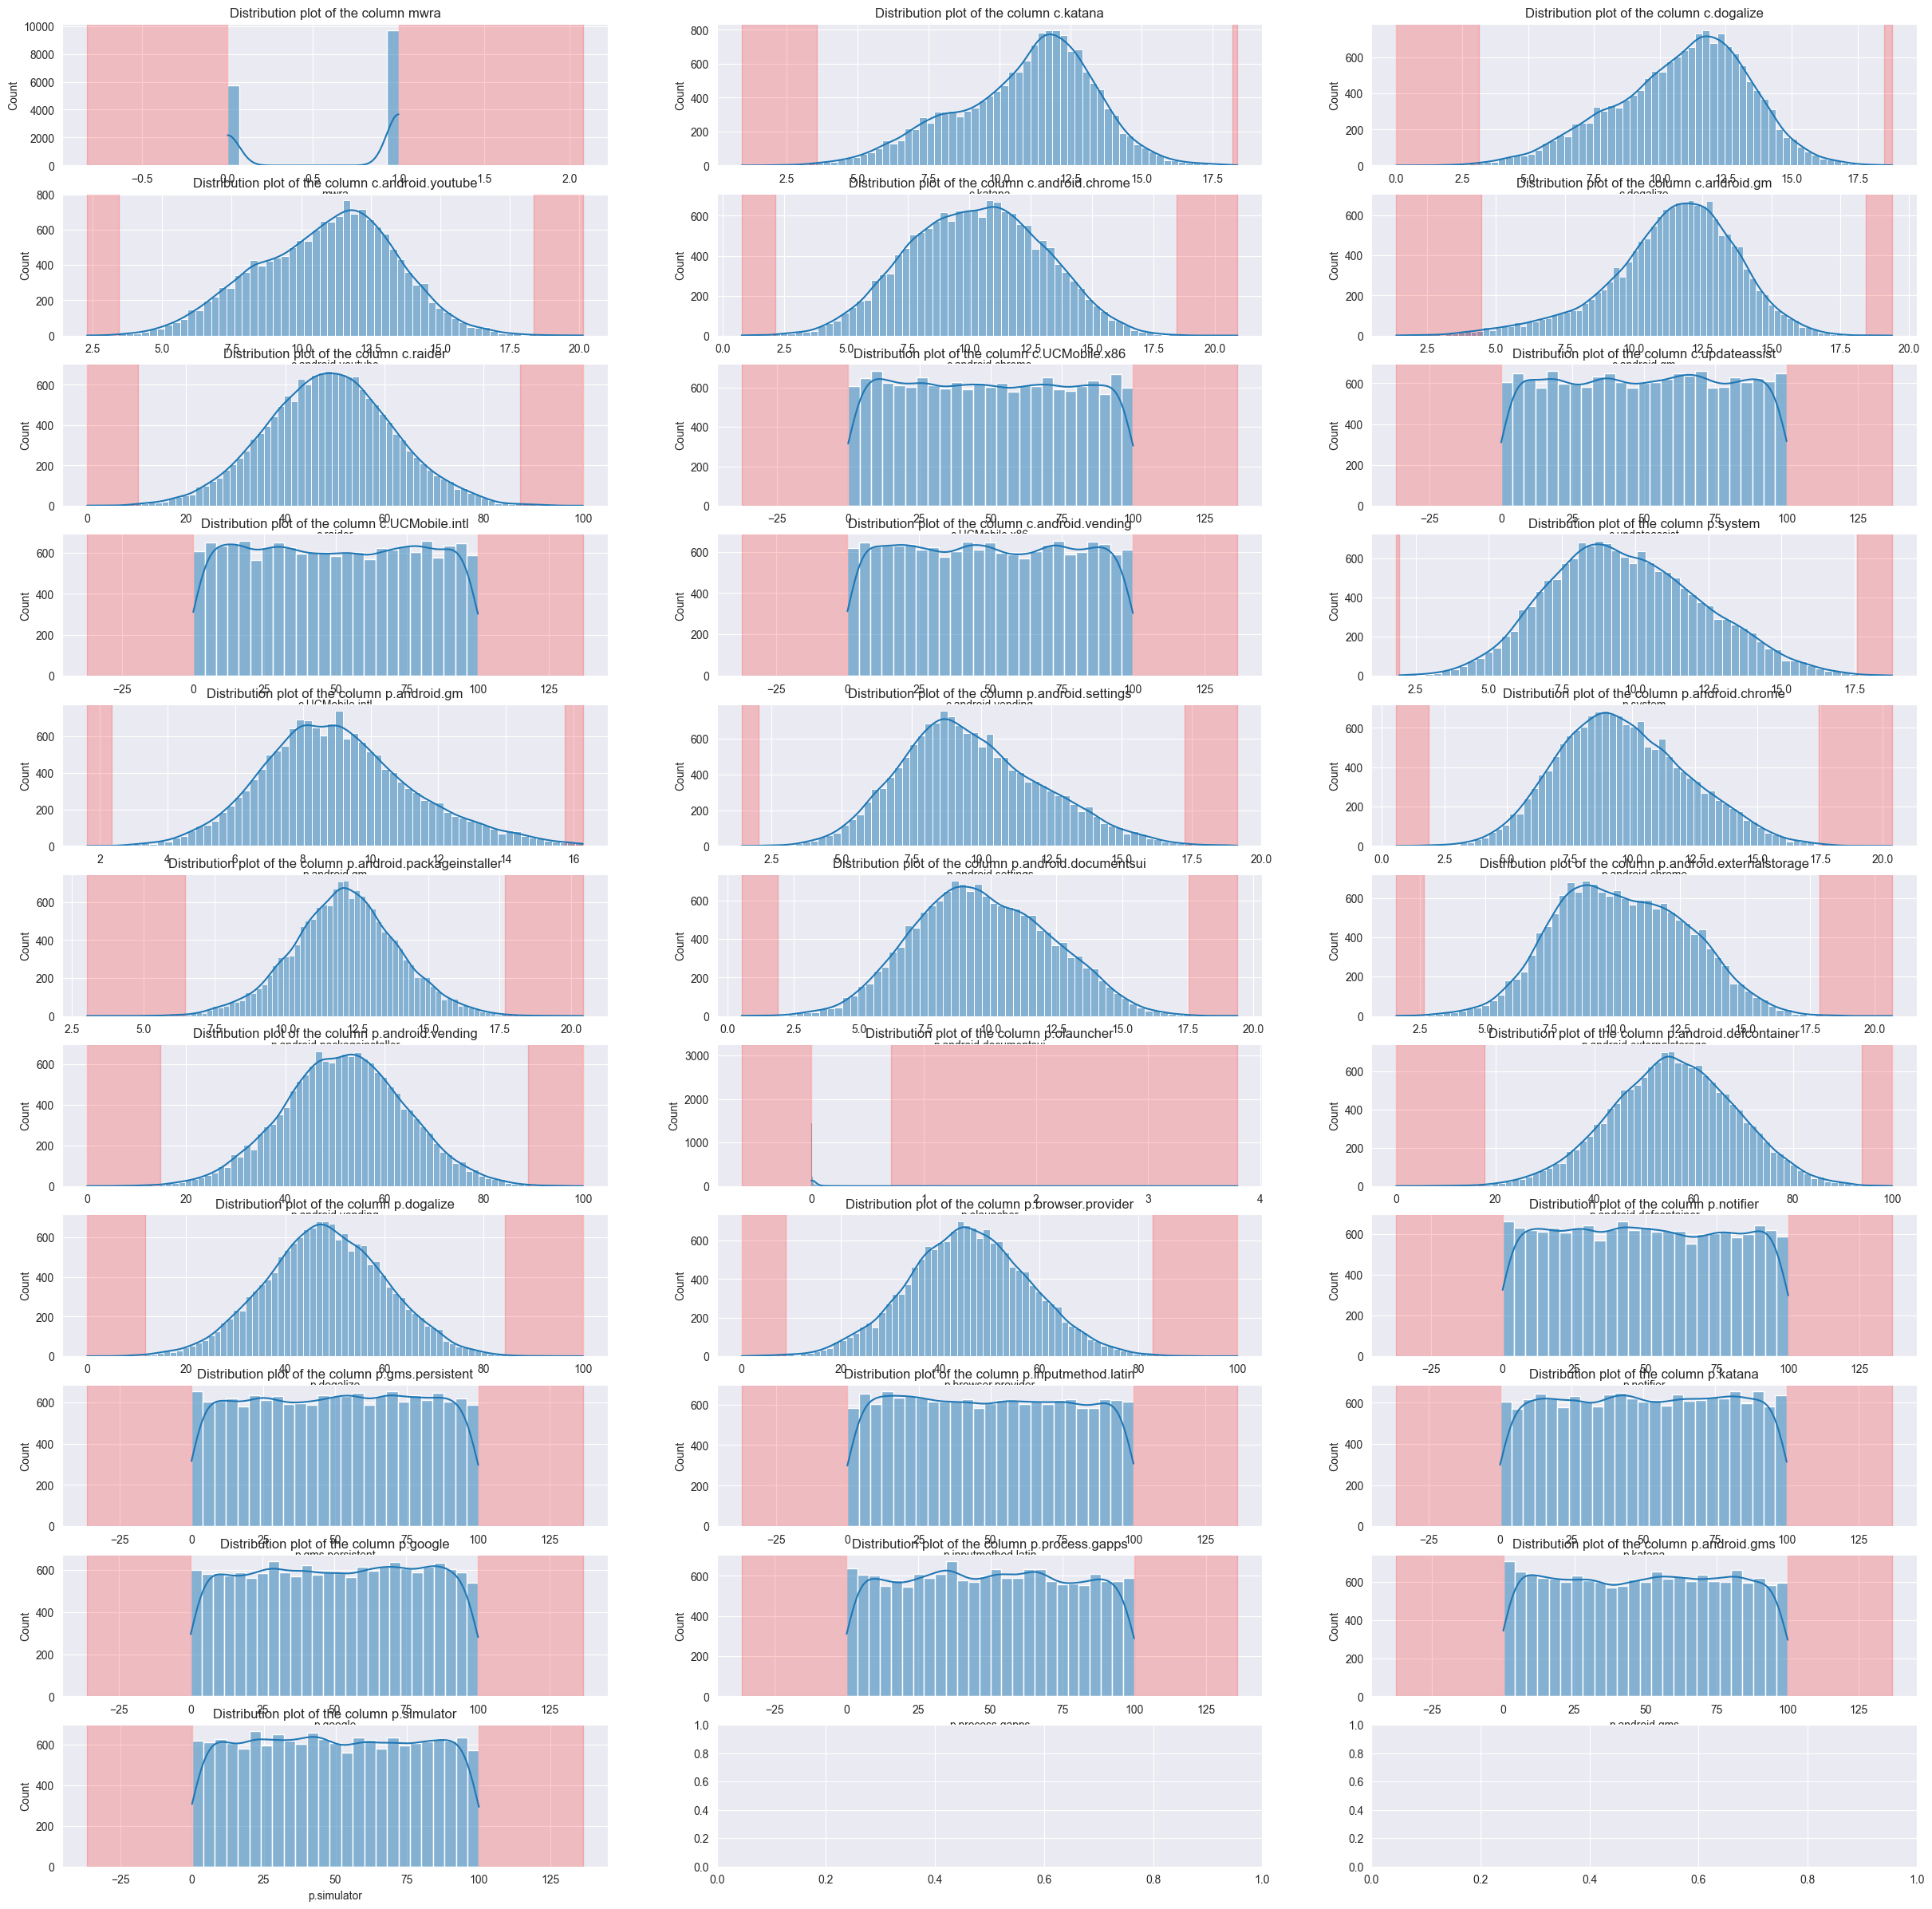

In [36]:
columns = new_dataset.columns

fig, axes = plt.subplots(nrows=(len(columns)//2) - 4, ncols=3, figsize=(30, 30))

axes = axes.flatten()

for i, col in enumerate(columns):
    data_mean, data_std = mean(new_dataset[col], axis=0), std(new_dataset[col], axis=0)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    sns.histplot(new_dataset[col], kde=True, ax=axes[i])
    axes[i].axvspan(xmin = lower,xmax= new_dataset[col].min(),alpha=0.2, color='red')
    axes[i].axvspan(xmin = upper,xmax= new_dataset[col].max(),alpha=0.2, color='red')
    axes[i].set_title(f'Distribution plot of the column {col}')

### 2.1 A - Split dataset on Train and Test data

In [37]:
new_dataset.columns

Index(['mwra', 'c.katana', 'c.dogalize', 'c.android.youtube',
       'c.android.chrome', 'c.android.gm', 'c.raider', 'c.UCMobile.x86',
       'c.updateassist', 'c.UCMobile.intl', 'c.android.vending', 'p.system',
       'p.android.gm', 'p.android.settings', 'p.android.chrome',
       'p.android.packageinstaller', 'p.android.documentsui',
       'p.android.externalstorage', 'p.android.vending', 'p.olauncher',
       'p.android.defcontainer', 'p.dogalize', 'p.browser.provider',
       'p.notifier', 'p.gms.persistent', 'p.inputmethod.latin', 'p.katana',
       'p.google', 'p.process.gapps', 'p.android.gms', 'p.simulator'],
      dtype='object')

In [38]:
target_column = 'mwra'
mwra = new_dataset[target_column]
data = new_dataset.drop(columns=[target_column], axis=1)

In [39]:
train_data, test_data, train_mwra, test_mwra = train_test_split(data, mwra, test_size=0.3, random_state=42)


#### 2.1 B Data transformation

Binary Encoding

In [42]:
import category_encoders as ce

# create object of BinaryEncoder
ce_binary = ce.BinaryEncoder(cols = ['mwra'])

# fit and transform and you will get the encoded data
ce_binary.fit_transform(train_mwra)

,mwra_0,mwra_1
9233,0,1
4874,0,1
8413,1,0
6762,1,0
10959,1,0
...,...,...
5191,1,0
13418,0,1
5390,1,0
860,0,1


#### 2.1 C

#### Scaling

Data normalization

## $x_{normalization}=\frac{x-x_{min}}{x_{max} - x_{min}}$

In [43]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
train_data = scaler.fit_transform(train_data)
print(train_data)

[[0.81732936 0.54980392 0.37644829 ... 0.76426666 0.1124086  0.9287528 ]
 [0.68626994 0.63799161 0.55200452 ... 0.55359196 0.8579009  0.767787  ]
 [0.53818076 0.65863061 0.39031616 ... 0.42560751 0.661125   0.9008142 ]
 ...
 [0.46973618 0.57778419 0.44026748 ... 0.71926332 0.6032233  0.0115573 ]
 [0.41503067 0.64385612 0.41392893 ... 0.06627574 0.8287044  0.9897339 ]
 [0.44842678 0.68466792 0.33338745 ... 0.02143192 0.0577888  0.1111205 ]]


Data standardization

## $x_{standardized} = \frac{x -\mu}{\sigma}$

In [44]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()

# transform data
train_data = scaler.fit_transform(train_data)
print(train_data)

[[ 1.63791753 -0.18230281 -0.66546561 ...  0.9313023  -1.32399256
   1.48586702]
 [ 0.72285611  0.47074538  0.57010252 ...  0.19804749  1.24001916
   0.92919538]
 [-0.31110762  0.6235815  -0.56786326 ... -0.24740329  0.56323723
   1.38924633]
 ...
 [-0.78898999  0.02489692 -0.21630491 ...  0.77466783  0.36409281
  -1.68609078]
 [-1.17094574  0.51417328 -0.40167614 ... -1.49806006  1.13960207
   1.69675933]
 [-0.93777296  0.81639318 -0.96852858 ... -1.65413931 -1.51184937
  -1.34176913]]


VarianceTreshold

remove low variance values

In [54]:
train_data.var()

0     1.000093
1     1.000093
2     1.000093
3     1.000093
4     1.000093
5     1.000093
6     1.000093
7     1.000093
8     1.000093
9     1.000093
10    1.000093
11    1.000093
12    1.000093
13    1.000093
14    1.000093
15    1.000093
16    1.000093
17    1.000093
18    1.000093
19    1.000093
20    1.000093
21    1.000093
22    1.000093
23    1.000093
24    1.000093
25    1.000093
26    1.000093
27    1.000093
28    1.000093
29    1.000093
dtype: float64

In [55]:
var = VarianceThreshold(0.05)

In [56]:
train_data = var.fit_transform(train_data)
train_data

array([[ 1.86512491, -0.27330985, -0.68965573, ...,  0.93134939,
        -1.31844923,  1.48304639],
       [ 0.69810292,  0.41083255,  0.54429715, ...,  0.19866254,
         1.24431153,  0.92939281],
       [-0.40681713,  0.58450125, -0.59764049, ..., -0.24680593,
         0.55838515,  1.38701684],
       ...,
       [-0.83426305, -0.06743326, -0.25965848, ...,  0.77488554,
         0.35764061, -1.6902528 ],
       [-1.15198827,  0.4597177 , -0.43923707, ..., -1.49880929,
         1.14222369,  1.6925605 ],
       [-0.96018271,  0.80978813, -0.97115964, ..., -1.65515002,
        -1.5028614 , -1.34373782]])

In [57]:
# train_data.shape

(10791, 30)

### Make data distribution more Gaussian

- Replacing the data with the log, square root, or inverse to remove skew
- Yeo-Johnson transform (default): works with positive and negative values
- Box-Cox transform: only works with strictly positive values
- λ = −1.0 is a reciprocal transform.
- λ = −0.5 is a reciprocal square root transform.  
- λ = 0.0 is a log transform.
- λ = 0.5 is a square root transform.
- λ = 1.0 is no transform.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>],
       [<Axes: title={'center': '25'}>, <Axes: title={'center': '26'}>,
        <Axes

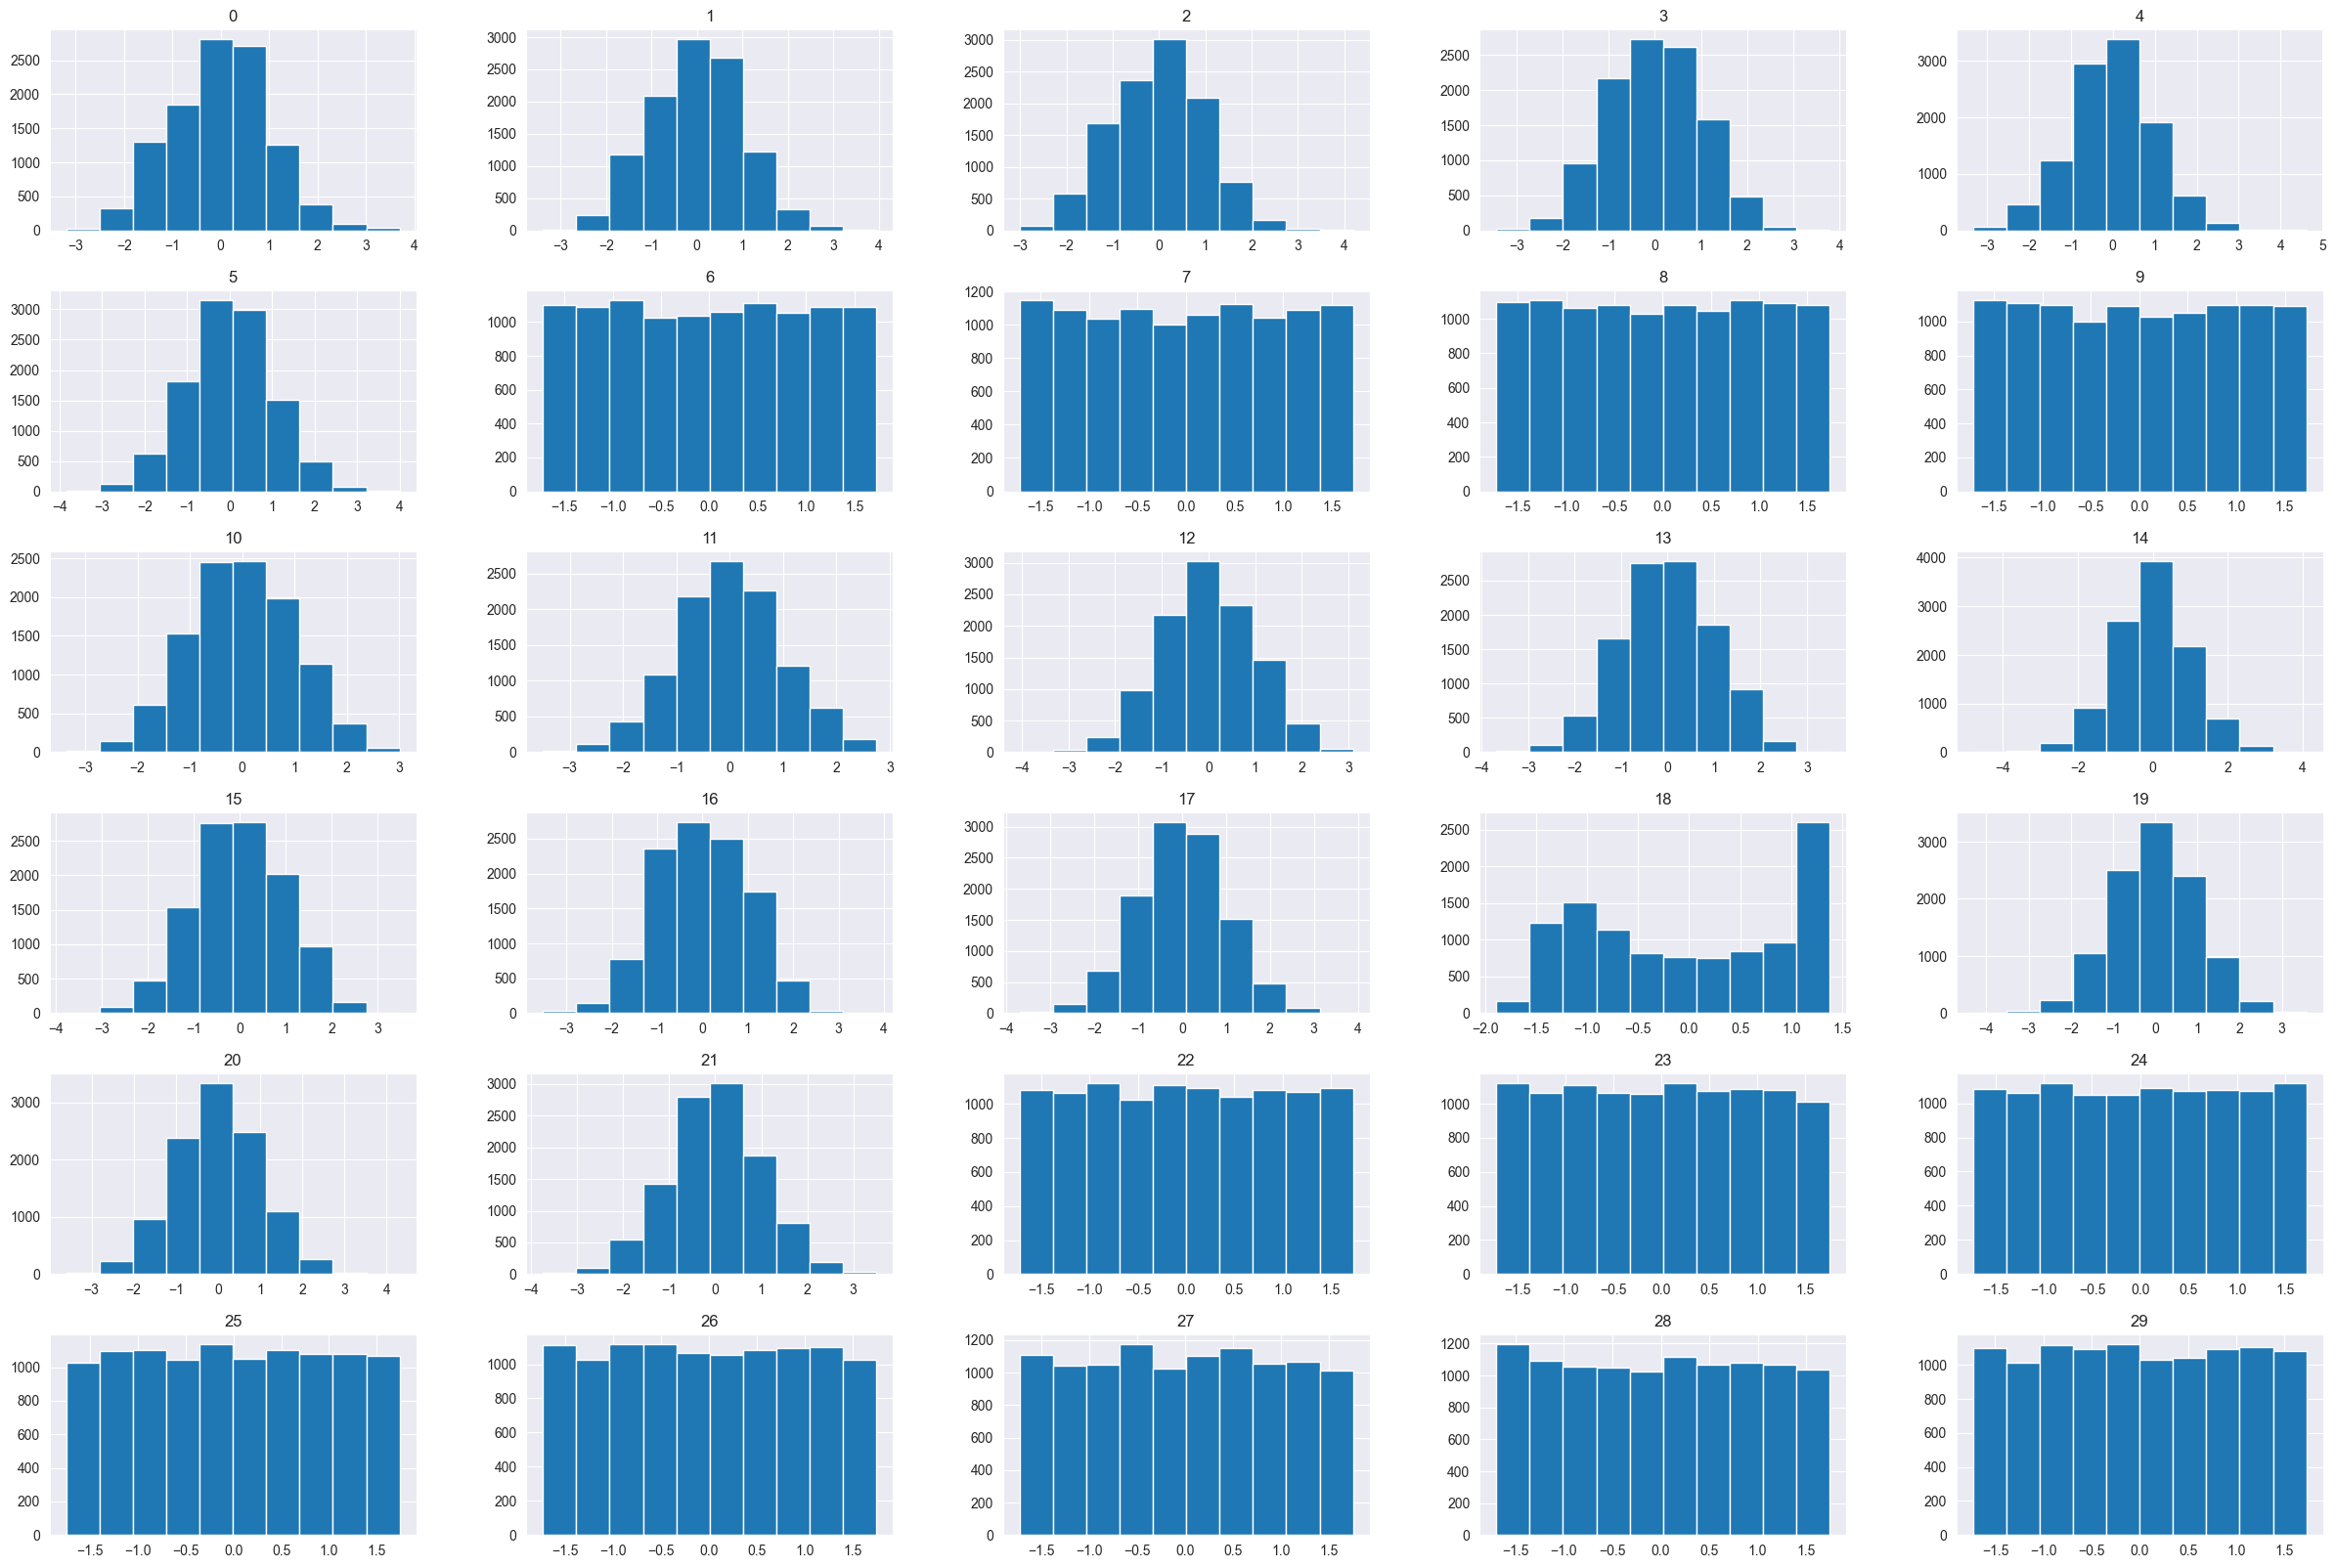

In [53]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 

plt.rcParams['figure.figsize'] = [30, 20]

# retrieve just the numeric input values
# train_data = train_data.values[:, :-1]

# perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
train_data = pt.fit_transform(train_data)

# convert the array back to a dataframe
train_data = DataFrame(train_data)

# histograms of the variables
train_data.hist() 

#### 2.1 D



- **Data cleaning** - We checked the dataset for negative values, NaN values and duplicates. We removed the 'ts' and 'imei' columns that were not useful for further training.
- **Data Integration** - merged the connection and process datasets into one dataset. Also removed outliers using the standard deviation method.
- **Data Transformation** - Divided the dataset into training and test data. Binary encoding was used to encode the target column 'mwra'. Normalized and standardized the training data. And also removed values with low variance.
- **Making the data distribution more Gaussian** - I used PowerTransformer to make the data distribution more Gaussian.

These methods were chosen to clean, integrate, transform, and make the data distribution Gaussian because these methods are the most suitable in terms of the amount of data, the amount of outliers, and the internal characteristics. These methods help to improve the quality of the data and make it suitable for further training. 
